In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv('Hitters_Data.csv')
df=df[['Hits','Years','Salary']]
df=df.dropna()
df

In [ ]:
X = df.drop('Salary',axis=1)
y = np.log(df['Salary'])

In [ ]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# create a regressor object 
regressor = DecisionTreeRegressor()  
# fit the regressor
regressor.fit(X_train, y_train) 

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regressor, feature_names=['Hits','Years'], filled=True)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
comp=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comp

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0, ccp_alpha=0.001)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regressor, feature_names=['Hits','Years'], filled=True)
y_pred = regressor.predict(X_test)

In [ ]:
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0, ccp_alpha=0.02)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regressor, feature_names=['Hits','Years'], filled=True)

In [ ]:
X_test

In [ ]:
regressor.predict(X_test)

In [ ]:
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

In [ ]:
regressor = DecisionTreeRegressor(ccp_alpha=0.1)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regressor, feature_names=['Hits','Years'], filled=True)

In [ ]:
regressor = DecisionTreeRegressor(ccp_alpha=0.5)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regressor, feature_names=['Hits','Years'], filled=True)

In [ ]:
regressor = DecisionTreeRegressor(max_depth=5)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regressor, feature_names=['Hits','Years'], filled=True)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
cv = KFold(n_splits=10, random_state=10, shuffle=True)
CVErrors=[]
alphas = np.linspace(0,0.5,num=1000)
for i in alphas:
    for train_index, validation_index in cv.split(X_train):
        X_trainp, X_valid = X_train.iloc[train_index], X_train.iloc[validation_index]
        y_trainp, y_valid = y_train.iloc[train_index], y_train.iloc[validation_index]
        regressor = DecisionTreeRegressor(ccp_alpha=i)
        regressor.fit(X_trainp, y_trainp) 
        y_pred=regressor.predict(X_valid)
        CVErrors.append([i,mean_squared_error(y_trainp, regressor.predict(X_trainp)),mean_squared_error(y_valid, y_pred)])    
df = pd.DataFrame(CVErrors,columns=['alpha','Training Error','Validation Error'])

In [ ]:
pd.set_option("display.max_rows", 10000)
df

In [ ]:
kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()
kfoldCV_by_alpha

In [ ]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(kfoldCV_by_alpha['alpha'].values,kfoldCV_by_alpha['Validation Error'].values,label = '10 fold CV Error')
ax.plot(kfoldCV_by_alpha['alpha'].values,kfoldCV_by_alpha['Training Error'].values,label = 'Training Error')
ax.set_xlabel('alpha')
ax.set_ylabel('Errors')
ax.tick_params(axis='x', labelsize=8)
ax.legend(loc='best')

In [ ]:
kfoldCV_by_alpha=kfoldCV_by_alpha.sort_values(by=['Validation Error'],ascending=True)
kfoldCV_by_alpha

In [ ]:
regressor = DecisionTreeRegressor(ccp_alpha=0.027027)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regressor, feature_names=['Hits','Years'], filled=True)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn.model_selection import cross_val_score
alphas = np.linspace(0,0.5,num=1000)
CVErrors=[]
for i in alphas:
    regressor = DecisionTreeRegressor(ccp_alpha=i)
    Errors=cross_val_score(regressor,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
    CVErrors.append([i,-1*np.mean(Errors)])
    df = pd.DataFrame(CVErrors,columns=['alpha','Validation Error'])

In [ ]:
kfoldCV_by_alpha=df.sort_values(by=['Validation Error'],ascending=True)
kfoldCV_by_alpha

In [ ]:
regressor = DecisionTreeRegressor(ccp_alpha=0.024024)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regressor, feature_names=['Hits','Years'], filled=True)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

In [ ]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)
path

In [ ]:
cv = KFold(n_splits=10, random_state=10, shuffle=True)
CVErrors=[]
for i in path.ccp_alphas:
    for train_index, validation_index in cv.split(X_train):
        X_trainp, X_valid = X_train.iloc[train_index], X_train.iloc[validation_index]
        y_trainp, y_valid = y_train.iloc[train_index], y_train.iloc[validation_index]
        regressor = DecisionTreeRegressor(ccp_alpha=i)
        regressor.fit(X_trainp, y_trainp) 
        y_pred=regressor.predict(X_valid)
        CVErrors.append([i,mean_squared_error(y_trainp, regressor.predict(X_trainp)),mean_squared_error(y_valid, y_pred)])    
df = pd.DataFrame(CVErrors,columns=['alpha','Training Error','Validation Error'])
kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()
kfoldCV_by_alpha

In [ ]:
kfoldCV_by_alpha=kfoldCV_by_alpha.sort_values(by=['Validation Error'],ascending=True)
kfoldCV_by_alpha

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0, ccp_alpha=1.710270e-02)  
regressor.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = plot_tree(regressor, feature_names=['Hits','Years'], filled=True)
y_pred = regressor.predict(X_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

In [2]:
#read in the data using pandas
df = pd.read_table('diabetesdata.txt')
#check data has been read in properly
df

,Preg,Glucose,BP,SkinThick,Insul,BMI,DPF,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X=df[['Glucose','BMI']]
y = df['Diabetes']

In [4]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [ ]:
DecisionTreeClassifier()

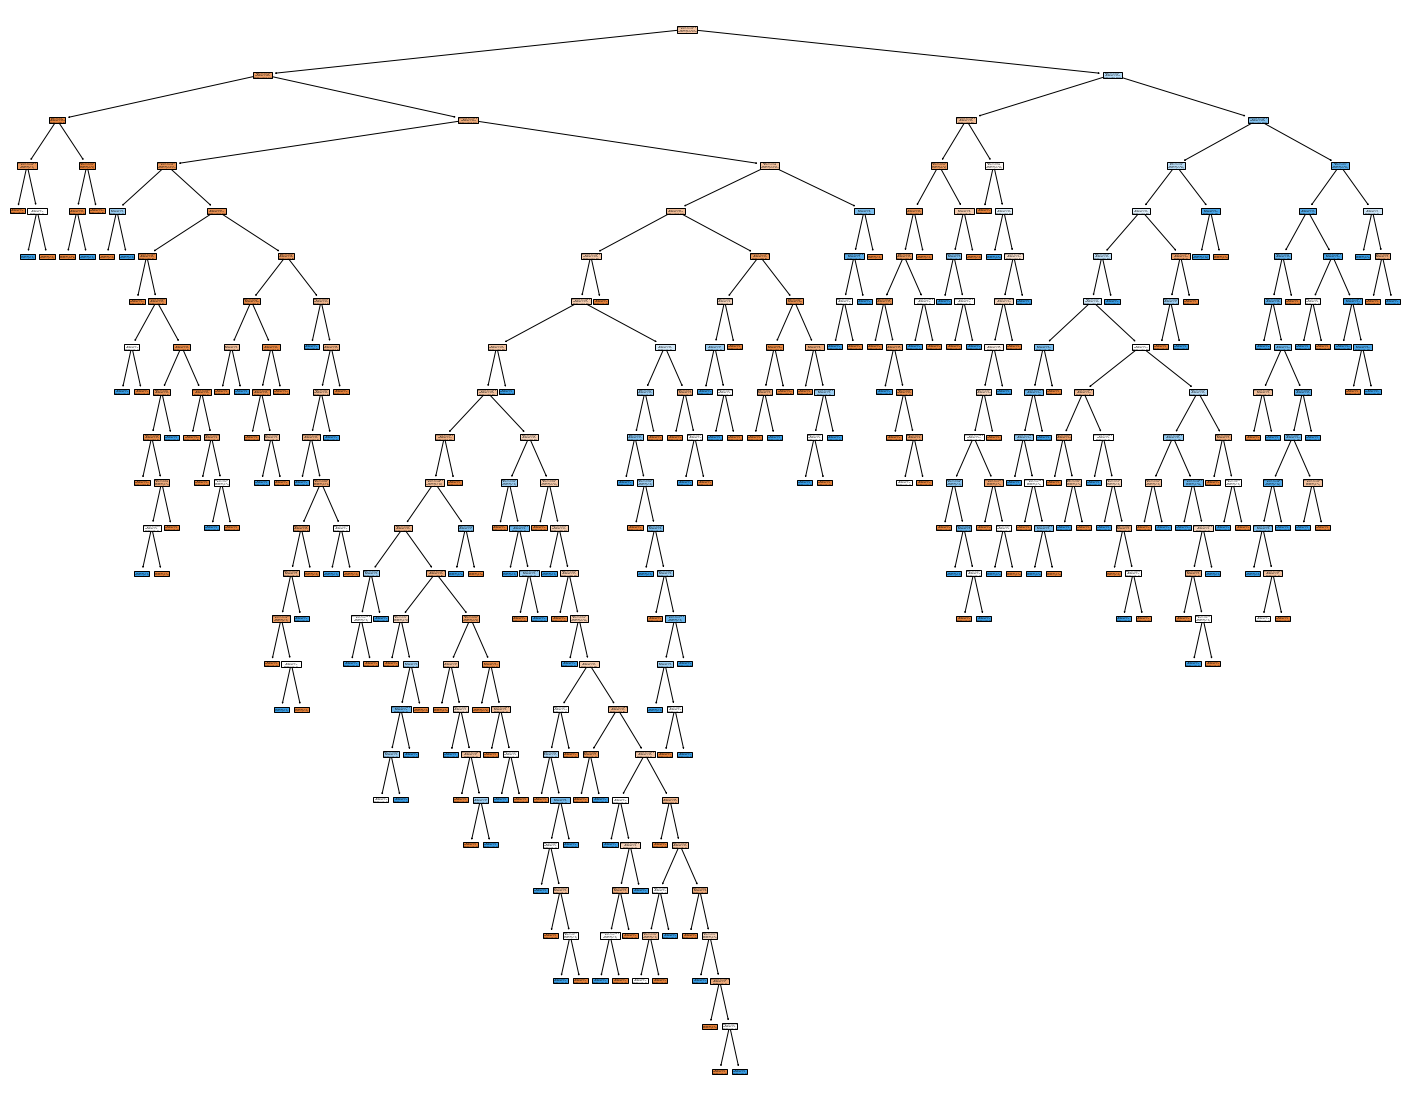

In [5]:
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = plot_tree(classifier, feature_names=['Glucose','BMI'], filled=True)

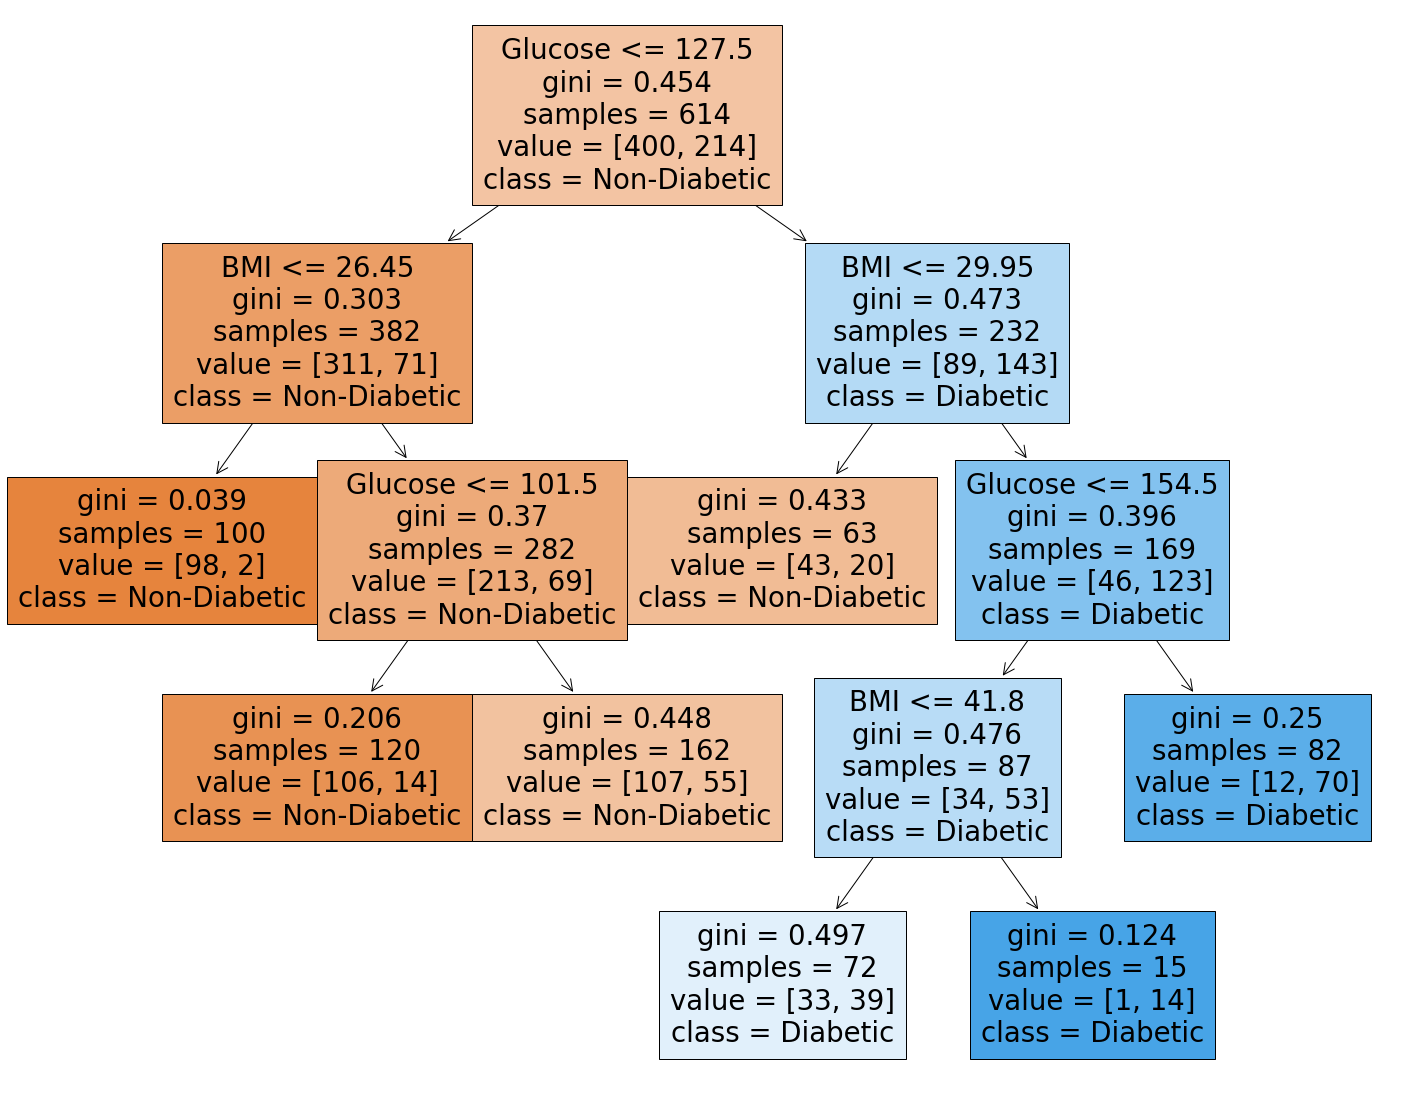

In [6]:
classifier = DecisionTreeClassifier(ccp_alpha=0.005)  
classifier.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = plot_tree(classifier, class_names=['Non-Diabetic','Diabetic'],feature_names=['Glucose','BMI'], filled=True)

In [7]:
X_test

,Glucose,BMI
488,99,25.6
413,143,26.2
112,89,31.2
222,119,25.2
711,126,29.6
...,...,...
139,105,36.9
178,143,45.0
654,106,34.2
110,171,33.3


In [8]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.7532467532467533

In [9]:
comp=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
comp = pd.concat([X_test.reset_index(drop=True), comp.reset_index(drop=True)], axis= 1)
comp

,Glucose,BMI,Actual,Predicted
0,99,25.6,0,0
1,143,26.2,0,0
2,89,31.2,0,0
3,119,25.2,0,0
4,126,29.6,0,0
...,...,...,...,...
149,105,36.9,0,0
150,143,45.0,0,1
151,106,34.2,0,0
152,171,33.3,1,1


In [10]:
y_predprobs = classifier.predict_proba(X_test)
y_predprobs

array([[0.98      , 0.02      ],
       [0.68253968, 0.31746032],
       [0.88333333, 0.11666667],
       [0.98      , 0.02      ],
       [0.66049383, 0.33950617],
       [0.66049383, 0.33950617],
       [0.98      , 0.02      ],
       [0.98      , 0.02      ],
       [0.14634146, 0.85365854],
       [0.98      , 0.02      ],
       [0.88333333, 0.11666667],
       [0.98      , 0.02      ],
       [0.88333333, 0.11666667],
       [0.98      , 0.02      ],
       [0.98      , 0.02      ],
       [0.68253968, 0.31746032],
       [0.66049383, 0.33950617],
       [0.45833333, 0.54166667],
       [0.98      , 0.02      ],
       [0.45833333, 0.54166667],
       [0.14634146, 0.85365854],
       [0.88333333, 0.11666667],
       [0.66049383, 0.33950617],
       [0.98      , 0.02      ],
       [0.66049383, 0.33950617],
       [0.66049383, 0.33950617],
       [0.88333333, 0.11666667],
       [0.98      , 0.02      ],
       [0.98      , 0.02      ],
       [0.68253968, 0.31746032],
       [0.

In [11]:
classifier = DecisionTreeClassifier() 
path = classifier.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.0004886 , 0.00054289, 0.00054289, 0.00065147,
        0.00086862, 0.00100822, 0.00100822, 0.0010193 , 0.00104235,
        0.00104958, 0.00108578, 0.00108578, 0.00108578, 0.00108578,
        0.00108578, 0.00108578, 0.00108578, 0.00111421, 0.00114257,
        0.00118448, 0.00122012, 0.0012215 , 0.0012215 , 0.0012215 ,
        0.0012215 , 0.0012215 , 0.00127687, 0.00130293, 0.00135722,
        0.00135722, 0.001396  , 0.00146114, 0.0014658 , 0.00146675,
        0.00153818, 0.00154723, 0.00154774, 0.00157931, 0.00158497,
        0.00159535, 0.00169653, 0.00171804, 0.00173724, 0.00174738,
        0.00190528, 0.0019544 , 0.0019801 , 0.002094  , 0.00210369,
        0.00217155, 0.00217155, 0.002443  , 0.0025038 , 0.00256336,
        0.00303182, 0.00303949, 0.00304017, 0.00304017, 0.00341779,
        0.00380022, 0.00441578, 0.00461912, 0.00478253, 0.00620297,
        0.00821741, 0.01115047, 0.0121389 , 0.02517158, 0.0871409 ]),
 'impurities': array([0.00651466

In [12]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, random_state=10, shuffle=True)
CVErrors=[]
for i in path.ccp_alphas:
    for train_index, validation_index in cv.split(X_train):
        X_trainp, X_valid = X_train.iloc[train_index], X_train.iloc[validation_index]
        y_trainp, y_valid = y_train.iloc[train_index], y_train.iloc[validation_index]
        classifier = DecisionTreeClassifier(ccp_alpha=i)
        classifier.fit(X_trainp, y_trainp) 
        y_pred=classifier.predict(X_valid)
        CVErrors.append([i,accuracy_score(y_trainp, classifier.predict(X_trainp)),accuracy_score(y_valid, y_pred)])    
df = pd.DataFrame(CVErrors,columns=['alpha','Training Accuracy','Validation Accuracy'])
kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()
kfoldCV_by_alpha

,alpha,Training Accuracy,Validation Accuracy
0,0.000000,0.994209,0.698704
1,0.000489,0.994209,0.693866
2,0.000543,0.994209,0.683263
3,0.000651,0.994209,0.690640
4,0.000869,0.994028,0.687361
5,0.001008,0.992399,0.685709
6,0.001019,0.992219,0.685748
7,0.001042,0.990771,0.697091
8,0.001050,0.991133,0.697065
9,0.001086,0.989625,0.691689


In [13]:
kfoldCV_by_alpha=kfoldCV_by_alpha.sort_values(by=['Validation Accuracy'],ascending=False)
kfoldCV_by_alpha

,alpha,Training Accuracy,Validation Accuracy
54,0.012139,0.776691,0.767134
53,0.011150,0.776691,0.767134
52,0.008217,0.776691,0.767134
48,0.004416,0.787185,0.758911
49,0.004619,0.786100,0.758911
47,0.003800,0.796235,0.753966
51,0.006203,0.778138,0.752353
50,0.004783,0.783207,0.752353
43,0.003039,0.822290,0.749075
42,0.003032,0.826094,0.749075


Test Accuracy: 0.7532467532467533


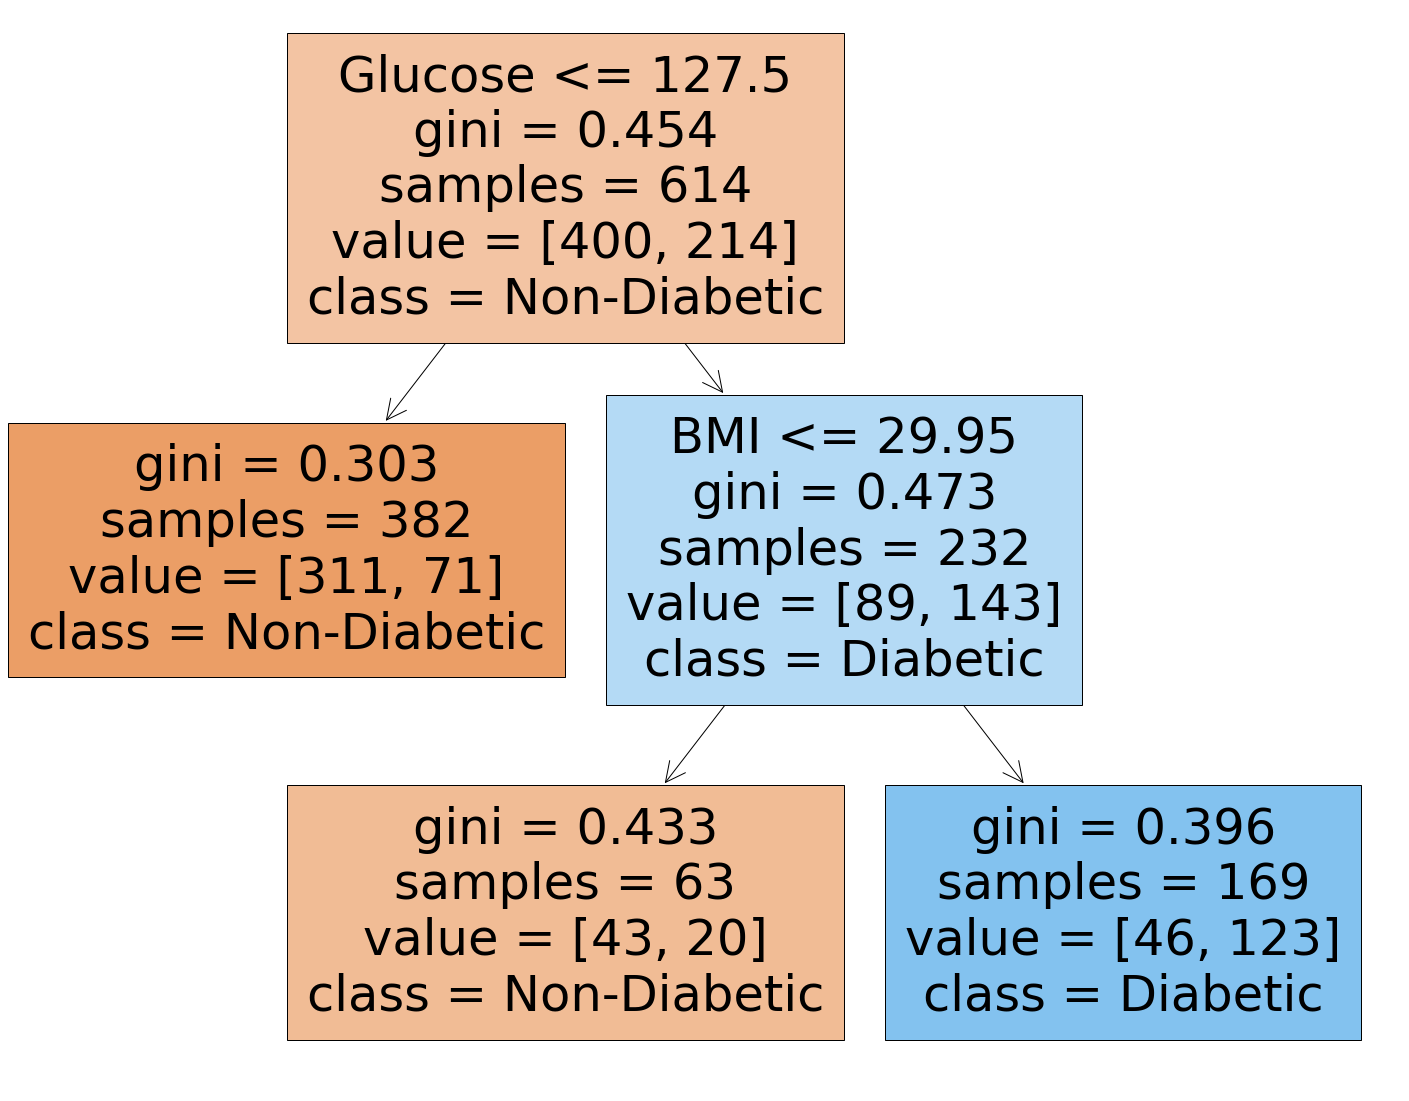

In [14]:
classifier = DecisionTreeClassifier(ccp_alpha=0.012139)  
classifier.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = plot_tree(classifier, class_names=['Non-Diabetic','Diabetic'],feature_names=['Glucose','BMI'], filled=True)
y_pred = classifier.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

In [15]:
def plot_dec_boundary(estimator,X,Y,h):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    X=np.array(X)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(10, 10))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.show()

<ipython-input-15-4eb947678218>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


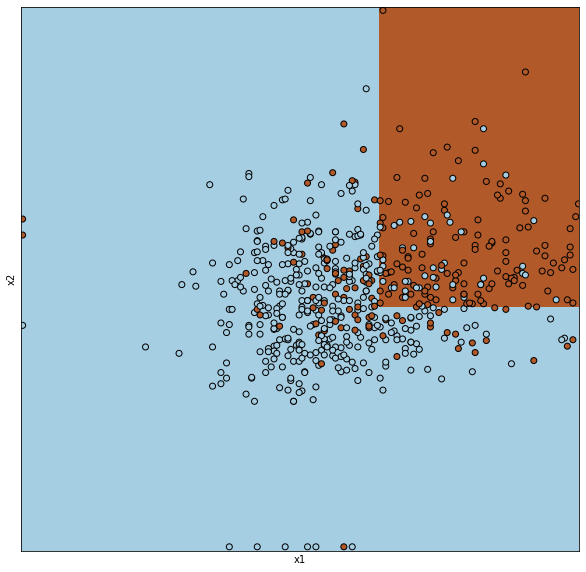

In [16]:
plot_dec_boundary(classifier,X_train,y_train,h=0.25)

In [ ]:
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X_col=X.columns

In [ ]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

In [ ]:
classifier = DecisionTreeClassifier() 
path = classifier.cost_complexity_pruning_path(X_train, y_train)
cv = KFold(n_splits=10, random_state=10, shuffle=True)
CVErrors=[]
for i in path.ccp_alphas:
    for train_index, validation_index in cv.split(X_train):
        X_trainp, X_valid = X_train.iloc[train_index], X_train.iloc[validation_index]
        y_trainp, y_valid = y_train.iloc[train_index], y_train.iloc[validation_index]
        classifier = DecisionTreeClassifier(ccp_alpha=i)
        classifier.fit(X_trainp, y_trainp) 
        y_pred=classifier.predict(X_valid)
        CVErrors.append([i,accuracy_score(y_trainp, classifier.predict(X_trainp)),accuracy_score(y_valid, y_pred)])    
df = pd.DataFrame(CVErrors,columns=['alpha','Training Error','Validation Error'])
kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()
kfoldCV_by_alpha

In [ ]:
kfoldCV_by_alpha=kfoldCV_by_alpha.sort_values(by=['Validation Error'],ascending=False)
kfoldCV_by_alpha

In [ ]:
classifier = DecisionTreeClassifier(ccp_alpha=0.018590)  
classifier.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = plot_tree(classifier, class_names=['Non-Diabetic','Diabetic'],feature_names=X_col, filled=True)
y_pred = classifier.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

In [ ]:
X_train

In [ ]:
confusion_matrix(y_test, y_pred)